# <b>Lending Club Case Study </b>

### <b>Business Objectives</b>

<blockquote>
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower-interest-rate loans through a fast online interface. 
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (credit loss). Credit loss is the amount of money the lender loses when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
If one can identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables that are strong indicators of default.  
The company can utilise this knowledge for its portfolio and risk assessment.
</blockquote>


## <b> 1. Imports </b>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format 

import warnings
warnings.filterwarnings("ignore")

## <b> 2. Data Sourcing </b>

In [2]:
# Load the loan dataset
loan_data = pd.read_csv("loan.csv")

In [3]:
loan_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [5]:
loan_data.isnull().mean()

id                           0.00
member_id                    0.00
loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
                             ... 
tax_liens                    0.00
tot_hi_cred_lim              1.00
total_bal_ex_mort            1.00
total_bc_limit               1.00
total_il_high_credit_limit   1.00
Length: 111, dtype: float64

## Data Cleaning and Understanding

In [6]:
# Display information about the dataset (column names, non-null counts, data types)
print(loan_data.info())

# Check summary statistics for numerical columns
# loan amount requested by borrowers
loan_amount_stats = loan_data['loan_amnt'].describe()
print("Loan Amount Statistics:")
print(loan_amount_stats)

# Interesent rate charged on the loan
int_rate_stats = loan_data['int_rate'].describe()
print("Interest Rate Statistics:")
print(int_rate_stats)

# Debt-to-Income Ratio
dti_stats = loan_data['dti'].describe()
print("Debt-to-Income Ratio Statistics:")
print(dti_stats)

#Revolving Balance
revol_bal_stats = loan_data['revol_bal'].describe()
print("Revolving Balance Statistics:")
print(revol_bal_stats)

# Calculate loan default rate
default_rate = loan_data['loan_status'].value_counts(normalize=True) * 100
print("Default Rate:\n", default_rate)

# Check for any missing values in the dataset
print(loan_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
Loan Amount Statistics:
count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64
Interest Rate Statistics:
count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object
Debt-to-Income Ratio Statistics:
count   39717.00
mean       13.32
std         6.68
min         0.00
25%         8.17
50%        13.40
75%        18.60
max        29.99
Name: dti, dtype: float64
Revolving Balance Statistics:
count    39717.00
mean     13382.53
std      15885.02
min          0.00
25%       3703.00
50%       8850.00
75%      17058.00
max     149588.00
Name: revol_bal, dtype: float64
Default Rate:
 loan_status
Fully Paid    82.96
Charged Off   14.17
Current       

In [7]:
loan_data.dropna(how="all", inplace=True, axis=1)

In [8]:
loan_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [9]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [10]:
loan_data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

### Removing columns that are not required or not useful
- member_id
- desc
- zip_code
- mths_since_last_delinq
- mths_since_last_record
- next_pymnt_d
- url
- emp_title
- tax_liens
- title
- pymnt_plan
- initial_list_status
- collections_12_mths_ex_med
- policy_code
- acc_now_delinq
- application_type
- delinq_amnt

In [11]:
unused_Columns = ["member_id", "desc","zip_code", "mths_since_last_delinq","mths_since_last_record","next_pymnt_d",
                 "url", "emp_title","tax_liens", "title", "pymnt_plan", "initial_list_status", "collections_12_mths_ex_med", 
                  "policy_code", "application_type", "application_type", "acc_now_delinq", "chargeoff_within_12_mths",
                  "delinq_amnt", "tax_liens" 
                 ]

loan_data.drop(labels=unused_Columns, axis=1, inplace=True)

In [12]:
loan_data.shape

(39717, 39)

In [13]:
loan_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [14]:
loan_data.revol_util.value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

#### Lets handle the missing values 

In [15]:
# feature "emp_length" has some missing values
print("Unique values present in 'emp_length':", loan_data.emp_length.value_counts())
print("*********************************************************************")
print("Null count before data cleaning", loan_data.emp_length.isnull().sum())

# Let fill null values in the "emp_length"
loan_data["emp_length"].fillna("Unknown", inplace=True)

print("Null values after data cleaning", loan_data.emp_length.isnull().sum())
print("*********************************************************************")
print("Unique values present in 'emp_length':", loan_data.emp_length.value_counts())

Unique values present in 'emp_length': emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64
*********************************************************************
Null count before data cleaning 1075
Null values after data cleaning 0
*********************************************************************
Unique values present in 'emp_length': emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Unknown      1075
Name: count, dtype: int64


In [16]:
# feature "pub_rec_bankruptcies" has some missing value
print("Unique values present in 'pub_rec_bankruptcies':", loan_data.pub_rec_bankruptcies.value_counts())
print("*********************************************************************")
print("Total null value in pub_rec_bankruptcies", loan_data.pub_rec_bankruptcies.isnull().sum())

# Let fill null values in the "pub_rec_bankruptcies"
loan_data["pub_rec_bankruptcies"].fillna("Unknown", inplace=True)

print("Null values after data cleaning", loan_data.pub_rec_bankruptcies.isnull().sum())
print("*********************************************************************")
print("Unique values present in 'emp_length':", loan_data.pub_rec_bankruptcies.value_counts())

Unique values present in 'pub_rec_bankruptcies': pub_rec_bankruptcies
0.00    37339
1.00     1674
2.00        7
Name: count, dtype: int64
*********************************************************************
Total null value in pub_rec_bankruptcies 697
Null values after data cleaning 0
*********************************************************************
Unique values present in 'emp_length': pub_rec_bankruptcies
0.00        37339
1.00         1674
 Unknown      697
2.00            7
Name: count, dtype: int64


In [17]:
loan = loan_data[loan_data['revol_util'].notnull()]
loan['revol_util'] = loan['revol_util'].str.replace("%","")
loan['revol_util'] = pd.to_numeric(loan['revol_util'])

print(loan['revol_util'].describe())
print(loan['revol_util'].median())

count   39667.00
mean       48.83
std        28.33
min         0.00
25%        25.40
50%        49.30
75%        72.40
max        99.90
Name: revol_util, dtype: float64
49.3


In [18]:
# as above analysis the mean, meadian are close to each other so lets fill na values with mean value of column
loan_data['revol_util'].fillna("48.83%")

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

#### Let's standardise the feature columns data

In [19]:
# Interest Rate is a numerical value but categorised as an object because it includes "%" in it
# let's do data cleaning and remove the "%" from "int_rate"

loan_data['int_rate'] = loan_data['int_rate'].str.replace("%","")
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'])

# Revolving line utilization rate is a numerical value but categorised as an object because it includes "%" in it
# Let's do data cleaning and remove the "%" from "revol_util"
loan_data['revol_util'] = loan_data['revol_util'].str.replace("%","")
loan_data['revol_util'] = pd.to_numeric(loan_data['revol_util'])

In [20]:
loan_data.last_pymnt_d.isnull().sum()

71

In [21]:
loan_data.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00


## <b> 3. Data Insights and Analysis </b>

### Numerical Data Analysis : Univariate

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64


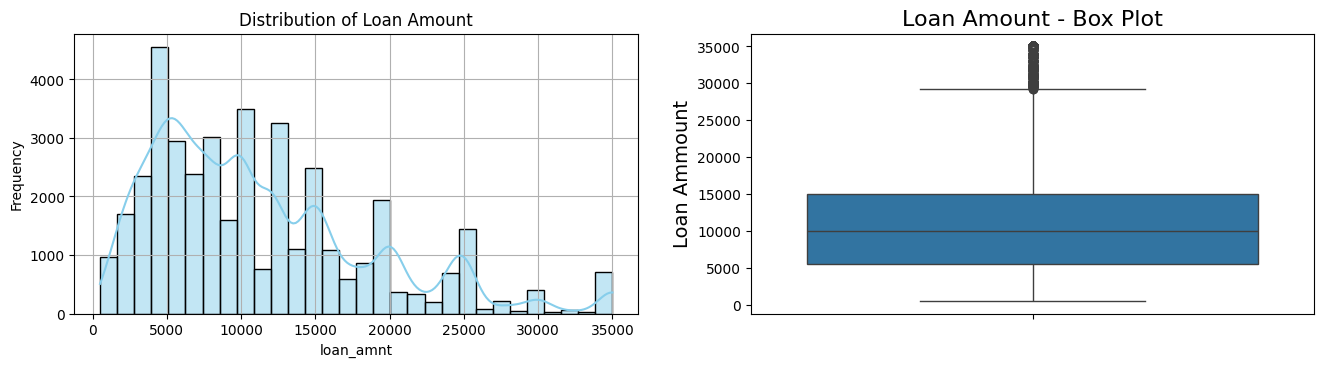

In [42]:
# Analysis of feature "loan_amnt"
print(loan_data['loan_amnt'].describe())

# Specifying plot size
plt.figure(figsize=(16,8))

# subplot 1: Distribution Plot


plt.subplot(2, 2, 1)

#4 - Univariate Analysis - Histogram of a Numerical Variable (e.g., loan amount)
ax = sns.histplot(data=loan_data, x='loan_amnt', bins=30, kde=True, color='skyblue')
ax.set_title('Distribution of Loan Amount')
ax.set_ylabel('Loan Amount ($)')
ax.set_ylabel('Frequency')
ax.grid(True)

# subplot 2: Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16)
ax.set_ylabel('Loan Ammount',fontsize=14)

plt.show()

#### <b>"loan_amnt": Loan Amount feature analysis</b>
- Most of the loan amounts are between 5500 - 15000 thousand
- 99-95 percentile of loan amounts are under 30000 thousand

****************************************  

count   39717.00
mean    10947.71
std      7187.24
min       500.00
25%      5400.00
50%      9600.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64


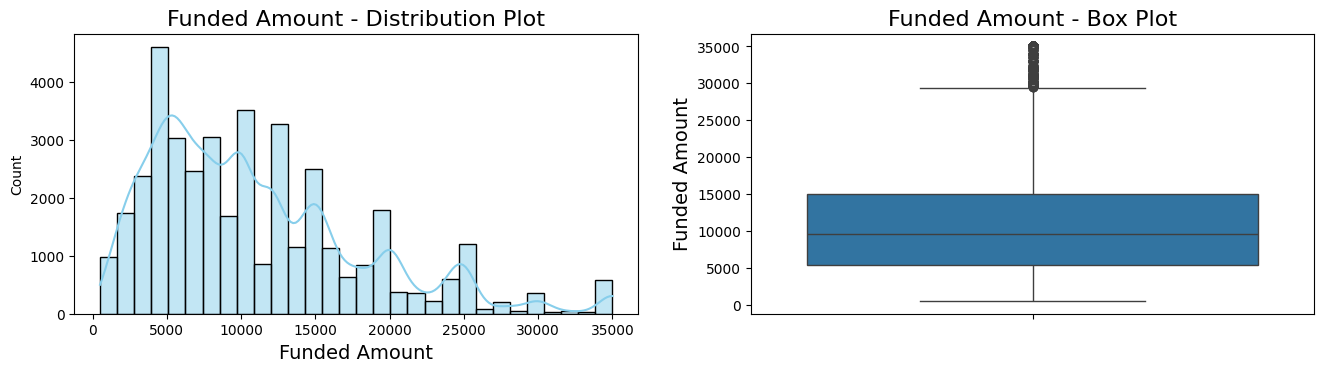

In [45]:
# Analysis of feature "funded_amnt"
print(loan_data['funded_amnt'].describe())

# Specifying plot size
plt.figure(figsize=(16,8))

# subplot 1: Distribution Plot
plt.subplot(2, 2, 1)
ax = sns.histplot(data=loan_data, x='funded_amnt',kde = True, bins=30, color='skyblue')
ax.set_title('Funded Amount - Distribution Plot',fontsize=16)
ax.set_xlabel('Funded Amount',fontsize=14)

# subplot 2: Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['funded_amnt'])
ax.set_title('Funded Amount - Box Plot',fontsize=16)
ax.set_ylabel('Funded Amount',fontsize=14)

plt.show()

#### <b>"funded_amnt": Funded Amount Amount feature analysis</b>

count   39717.00
mean    10397.45
std      7128.45
min         0.00
25%      5000.00
50%      8975.00
75%     14400.00
max     35000.00
Name: funded_amnt_inv, dtype: float64


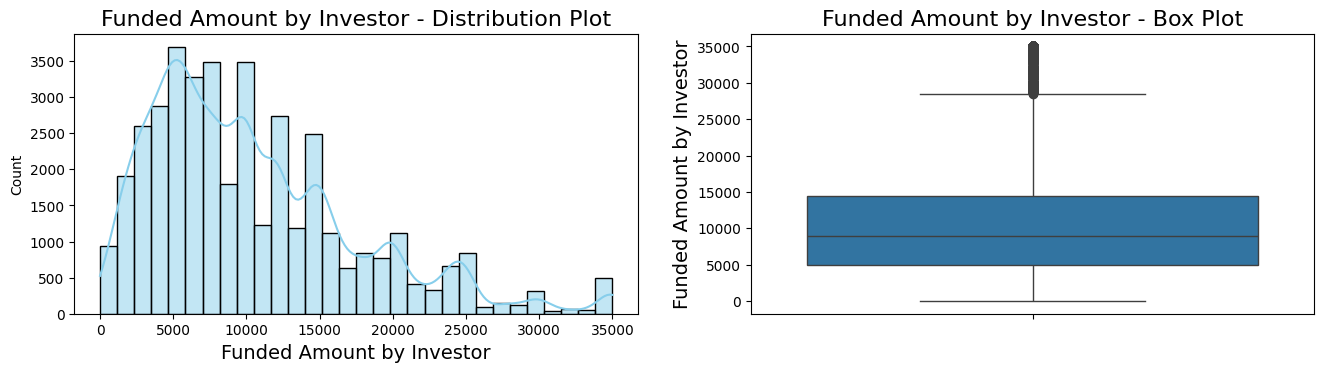

In [43]:
# Analysis of feature "funded_amnt_inv"
print(loan_data['funded_amnt_inv'].describe())

# Specifying plot size
plt.figure(figsize=(16,8))

# subplot 1: Distribution Plot
plt.subplot(2, 2, 1)
ax = sns.histplot(data=loan_data, x='funded_amnt_inv', kde = True, bins=30, color='skyblue')
ax.set_title('Funded Amount by Investor - Distribution Plot',fontsize=16)
ax.set_xlabel('Funded Amount by Investor',fontsize=14)

# subplot 2: Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['funded_amnt_inv'])
ax.set_title('Funded Amount by Investor - Box Plot',fontsize=16)
ax.set_ylabel('Funded Amount by Investor',fontsize=14)

plt.show()

count   39717.00
mean      324.56
std       208.87
min        15.69
25%       167.02
50%       280.22
75%       430.78
max      1305.19
Name: installment, dtype: float64


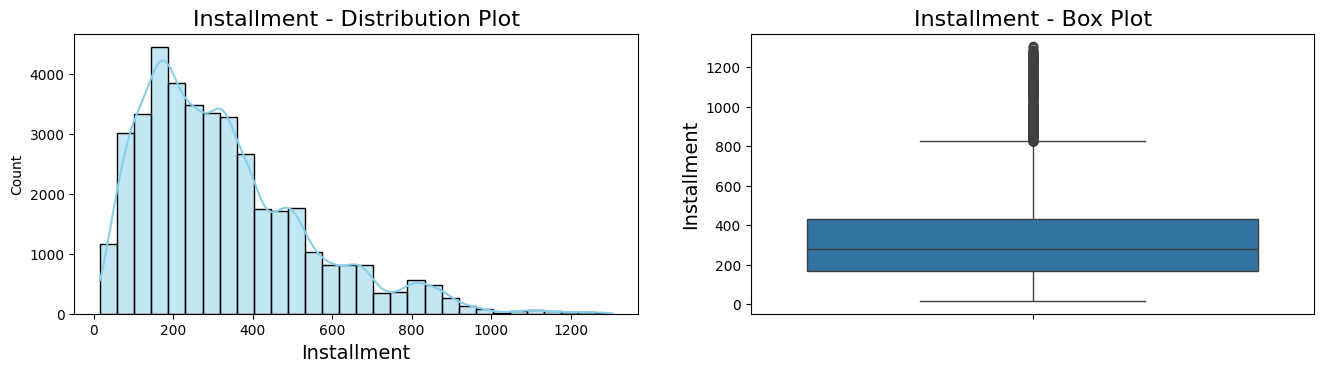

In [37]:
# Analysis of feature "installment"
print(loan_data['installment'].describe())

# Specifying plot size
plt.figure(figsize=(16,8))

# subplot 1: Distribution Plot
plt.subplot(2, 2, 1)
ax = sns.histplot(data=loan_data, x='installment', kde = True, bins=30, color='skyblue')
ax.set_title('Installment - Distribution Plot',fontsize=16)
ax.set_xlabel('Installment',fontsize=14)

# subplot 2: Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['installment'])
ax.set_title('Installment - Box Plot',fontsize=16)
ax.set_ylabel('Installment',fontsize=14)

plt.show()

#### <b>"installment": Instalment Amount feature analysis</b>
- Most of the Installment amounts are between 167 - 430
- The highest amount of instalment paid by some is 1305.19 and the lowest instalment paid by someone is 15.69

*************************

count   39717.00
mean       12.02
std         3.72
min         5.42
25%         9.25
50%        11.86
75%        14.59
max        24.59
Name: int_rate, dtype: float64


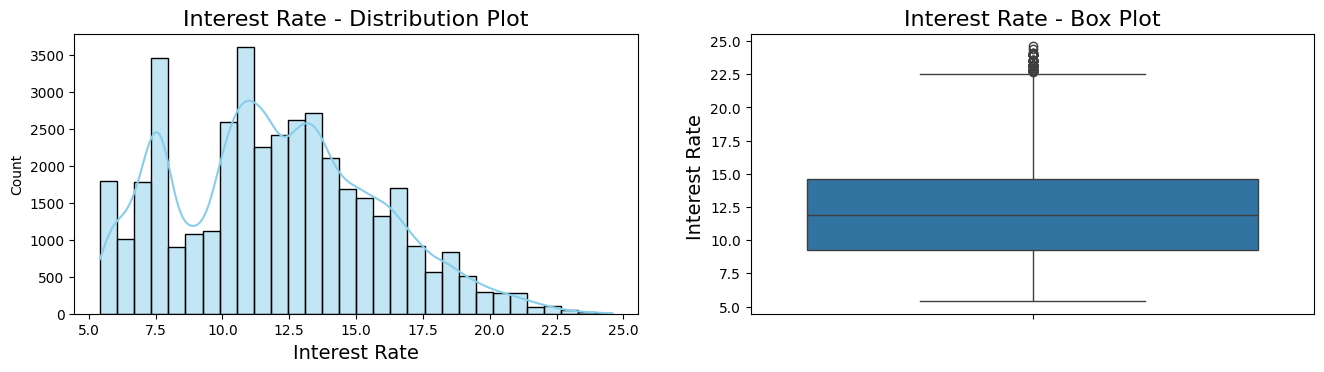

In [26]:
# Analysis of feature "int_rate"
print(loan_data['int_rate'].describe())

# let's analyse the data

# Specifying plot size
plt.figure(figsize=(16,8))

# subplot 1: Distribution Plot
plt.subplot(2, 2, 1)
ax = sns.histplot(data=loan_data, x='int_rate', kde=True, bins=30, color='skyblue')
ax.set_title('Interest Rate - Distribution Plot',fontsize=16)
ax.set_xlabel('Interest Rate',fontsize=14)

# subplot 2: Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16)
ax.set_ylabel('Interest Rate ',fontsize=14)

plt.show()

#### <b>"int_rate": Interest Rate feature analysis</b>
- The majority of loan applications have 9.25% to 14.59% of interest rate
- From the Distribution plot, we got the insights that as the interest rate goes beyond 14.59% the number of loan applications decreasing

*************************

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64


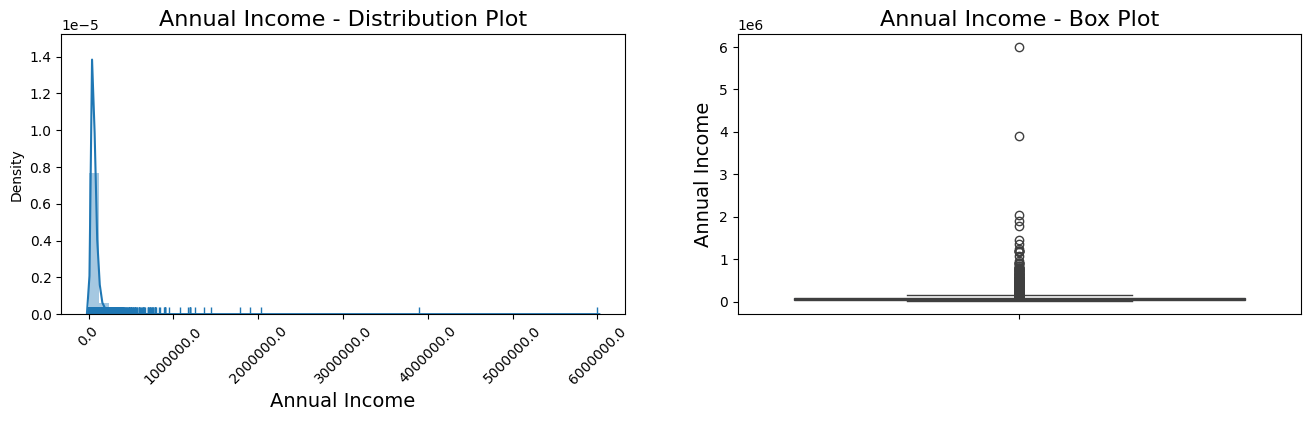

In [27]:
loan_data['annual_inc'] = loan_data['annual_inc'].apply(lambda x: f"{x:.0f}").astype(int)

print(loan_data['annual_inc'].describe())

# Specifying plot size
plt.figure(figsize=(16, 8))

# subplot 1: Distribution Plot
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_data['annual_inc'], rug=True)
ax.set_title('Annual Income - Distribution Plot', fontsize=16)
ax.set_xlabel('Annual Income', fontsize=14)
ax.set_xticklabels(ax.get_xticks(), rotation=45)  # Rotate x-axis labels for better readability

# subplot 2: Box Plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_data['annual_inc'])
ax.set_title('Annual Income - Box Plot', fontsize=16)
ax.set_ylabel('Annual Income', fontsize=14)

plt.show()

count    37743.00
mean     61071.86
std      27831.00
min       4000.00
25%      40000.00
50%      56000.00
75%      78000.00
max     142000.00
Name: annual_inc, dtype: float64


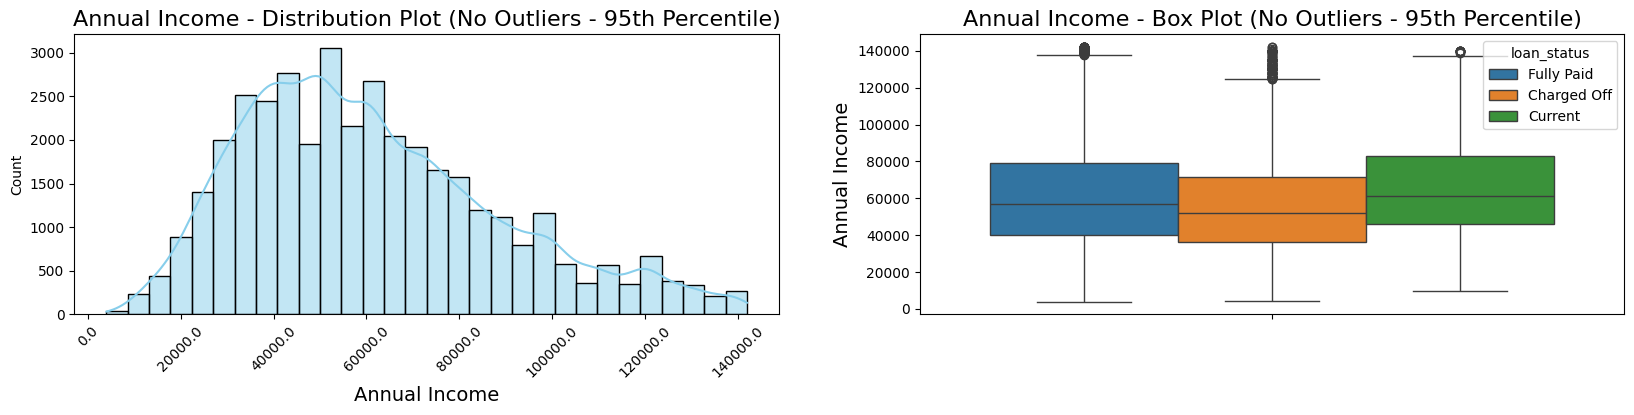

In [28]:
# Finding the 95th percentile of 'annual_inc'
percentile_95 = loan_data['annual_inc'].quantile(0.95)

# Removing data points above the 95th percentile
loan_data_no_outliers = loan_data[loan_data['annual_inc'] <= percentile_95]

print(loan_data_no_outliers['annual_inc'].describe())

# Creating a new cell for visualization
plt.figure(figsize=(20, 8))

# Distribution Plot after removing outliers above 95th percentile
plt.subplot(2, 2, 3)
ax = sns.histplot(data=loan_data_no_outliers, x='annual_inc', kde=True, bins=30, color='skyblue')
ax.set_title('Annual Income - Distribution Plot (No Outliers - 95th Percentile)', fontsize=16)
ax.set_xlabel('Annual Income', fontsize=14)
ax.set_xticklabels(ax.get_xticks(), rotation=45)  # Rotate x-axis labels for better readability

# Box Plot after removing outliers above 95th percentile
plt.subplot(2, 2, 4)
ax = sns.boxplot(y=loan_data_no_outliers['annual_inc'], hue=loan_data.loan_status)
ax.set_title('Annual Income - Box Plot (No Outliers - 95th Percentile)', fontsize=16)
ax.set_ylabel('Annual Income', fontsize=14)

plt.show()


##### <b>"annual_inc": Annual Income feature analysis</b>
- The majority of loan applicants have an annual income of 40000 to 78000
- People who default have less avg income than others 

*************************

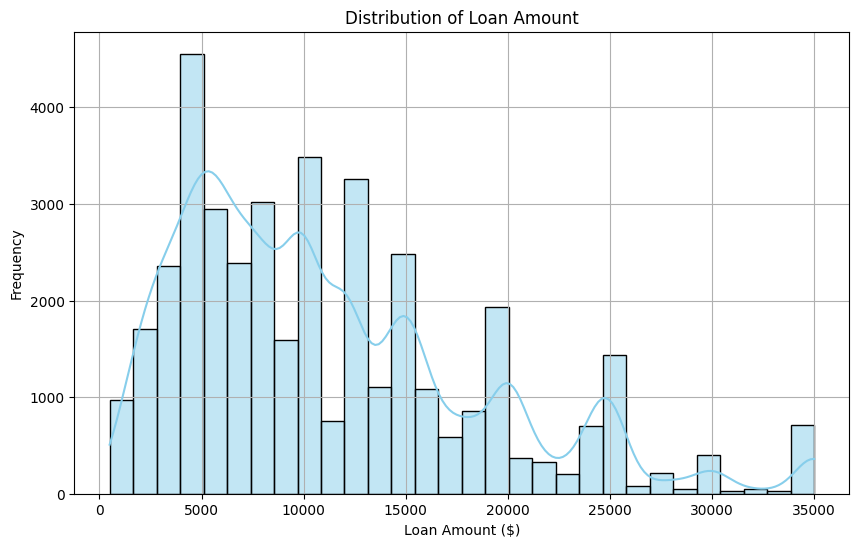

### <b>Categorial Data Analysis</b>

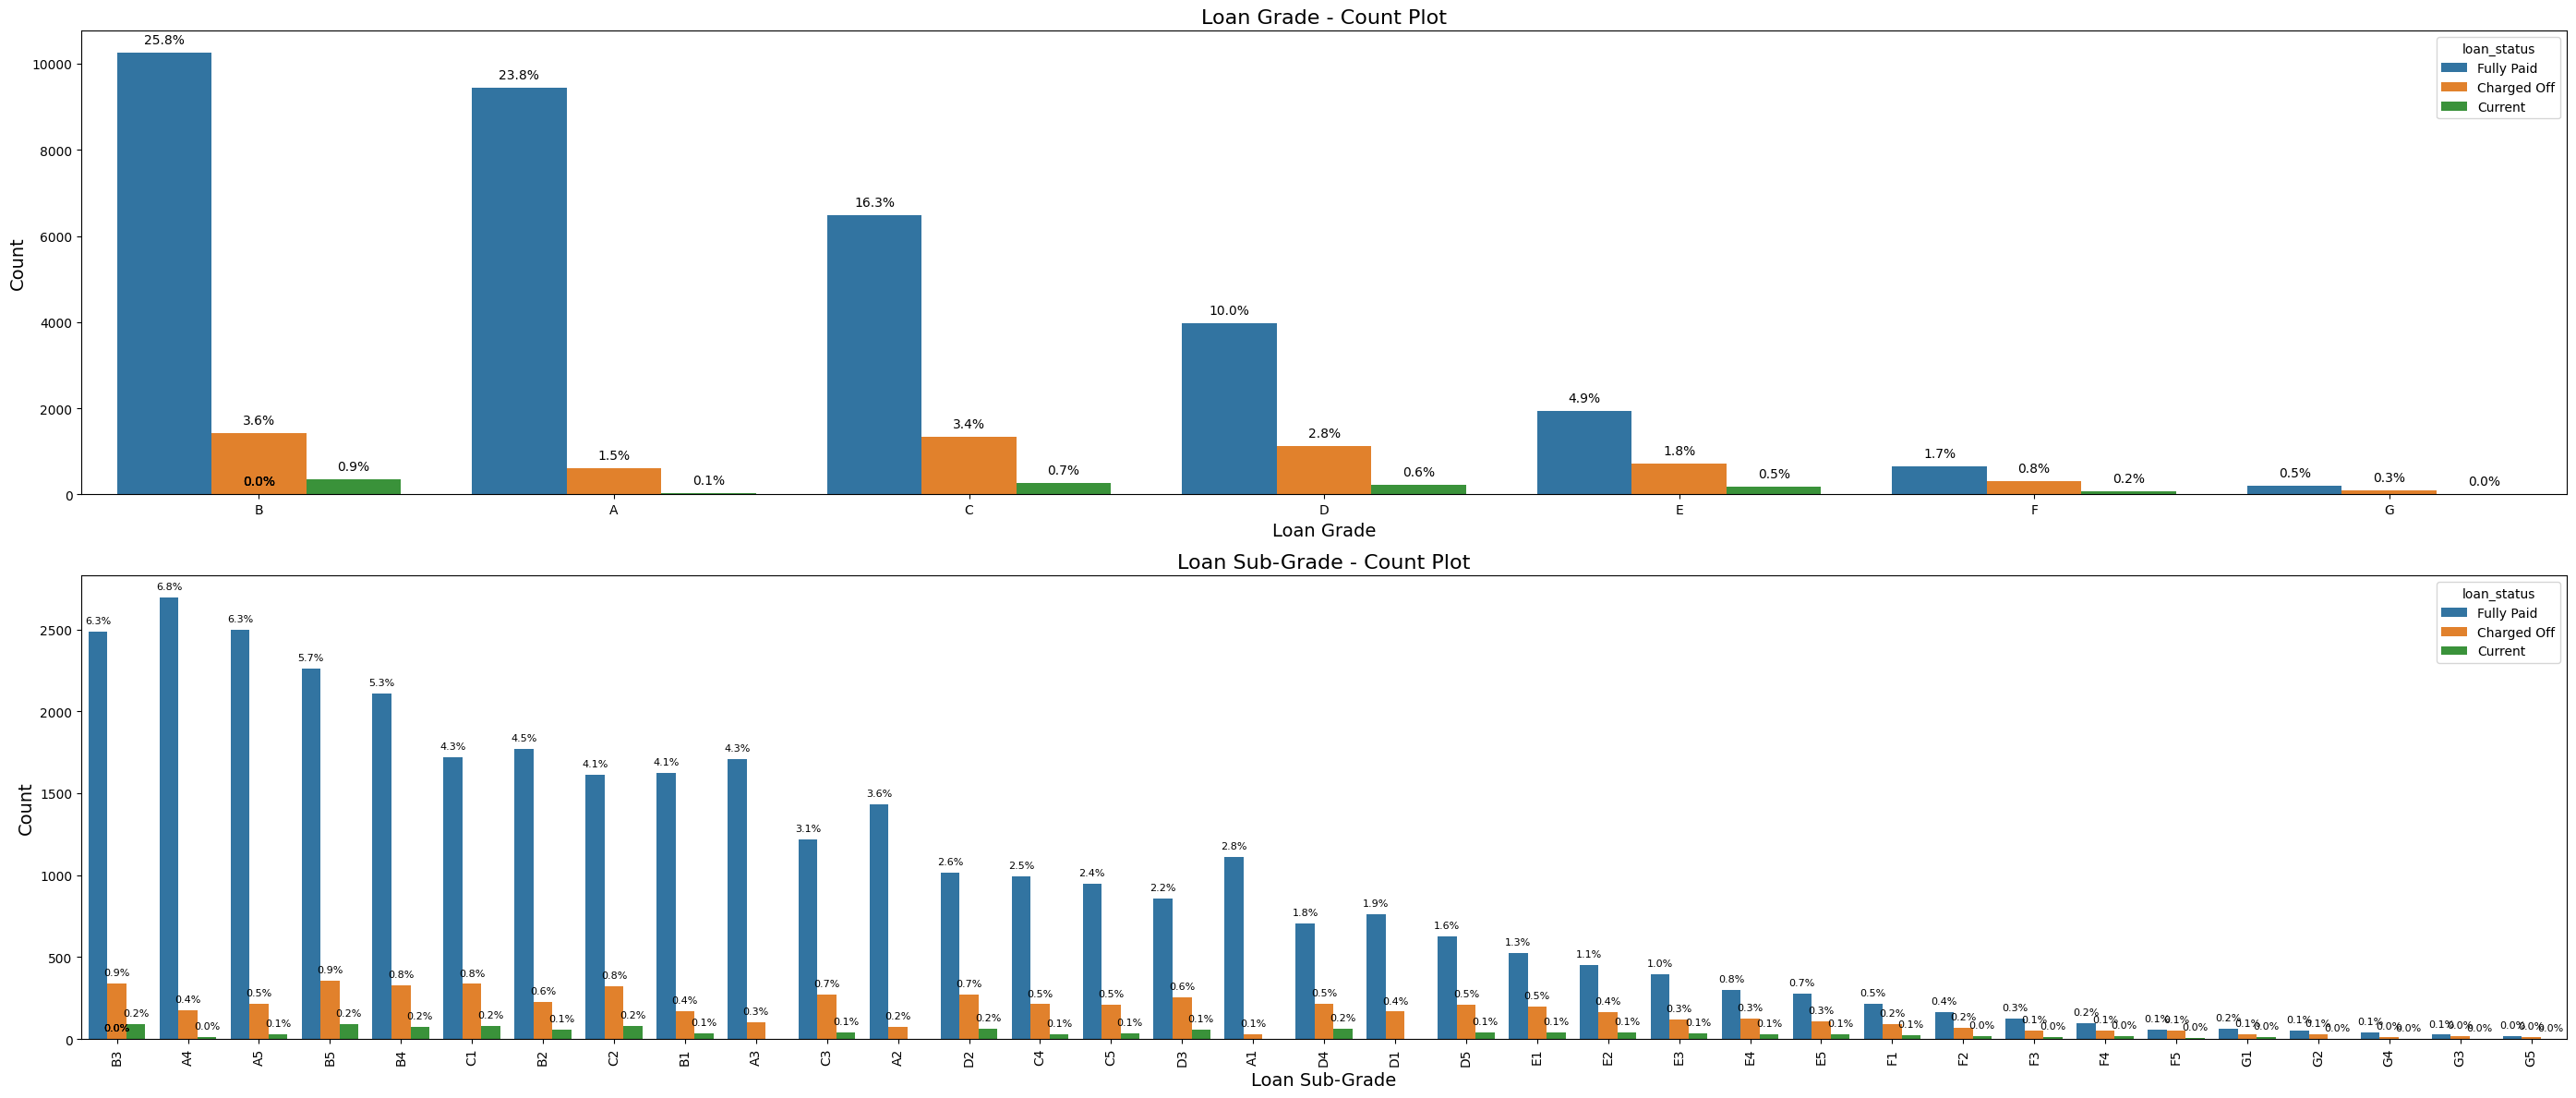

In [30]:
# Analysis of feature "grade" and "sub_grade"

# Specifying plot size
fig, ax = plt.subplots(2, 1, figsize=(28, 12))

# Subplot 1: Count Plot for "grade"
bx1 = sns.countplot(x=loan_data.grade, order=loan_data.grade.value_counts().index, ax=ax[0], hue=loan_data.loan_status)
bx1.set_title('Loan Grade - Count Plot', fontsize=16)
bx1.set_xlabel('Loan Grade', fontsize=14)
bx1.set_ylabel('Count', fontsize=14)

# Calculate percentages for "grade"
total_grade = len(loan_data.grade)
for p in bx1.patches:
    height = p.get_height()
    bx1.annotate('{:.1f}%'.format(100 * height / total_grade), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Subplot 2: Count Plot for "sub_grade"
bx2 = sns.countplot(x=loan_data.sub_grade, order=loan_data.sub_grade.value_counts().index, ax=ax[1], hue=loan_data.loan_status)
bx2.set_title('Loan Sub-Grade - Count Plot', fontsize=16)
bx2.set_xlabel('Loan Sub-Grade', fontsize=14)
bx2.set_ylabel('Count', fontsize=14)
bx2.tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Calculate percentages for "sub_grade"
total_sub_grade = len(loan_data.sub_grade)
for p in bx2.patches:
    height = p.get_height()
    bx2.annotate('{:.1f}%'.format(100 * height / total_sub_grade), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### <b>"grade" and "sub_grade" features analysis</b>
- Most of the loan applications are categorised as grade "B" or "A" or "C"
- It less chance to loan to default if it grade is "A"
- 30 % of applications categorised under grade "B" and 25% of applications categorised under "A"

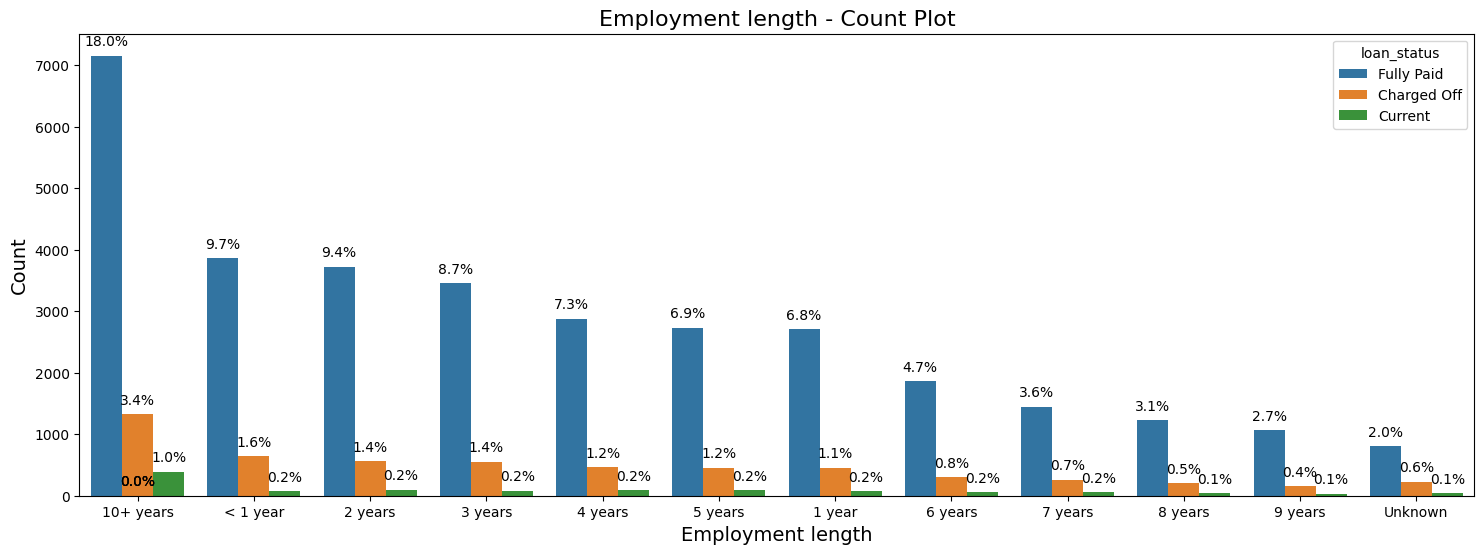

In [31]:
# Analysis of feature "emp_length"

# Specifying plot size
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

# Subplot 1: Count Plot with percentage
bx1 = sns.countplot(x=loan_data.emp_length, order=loan_data.emp_length.value_counts().index, hue=loan_data.loan_status)
bx1.set_title('Employment length - Count Plot', fontsize=16)
bx1.set_xlabel('Employment length', fontsize=14)
bx1.set_ylabel('Count', fontsize=14)

# Calculate percentages
total = len(loan_data.emp_length)
for p in bx1.patches:
    height = p.get_height()
    bx1.annotate('{:.1f}%'.format(100 * height / total), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')


plt.show()

#### <b>"emp_length": Employment length features analysis</b>
- Most of the people who apply for loans have experience of 10+ years
- Of all applicants, more than 22% applicant have 10+ years of experience
- 2.7% of applicants didn't provide their employment length

*******************************

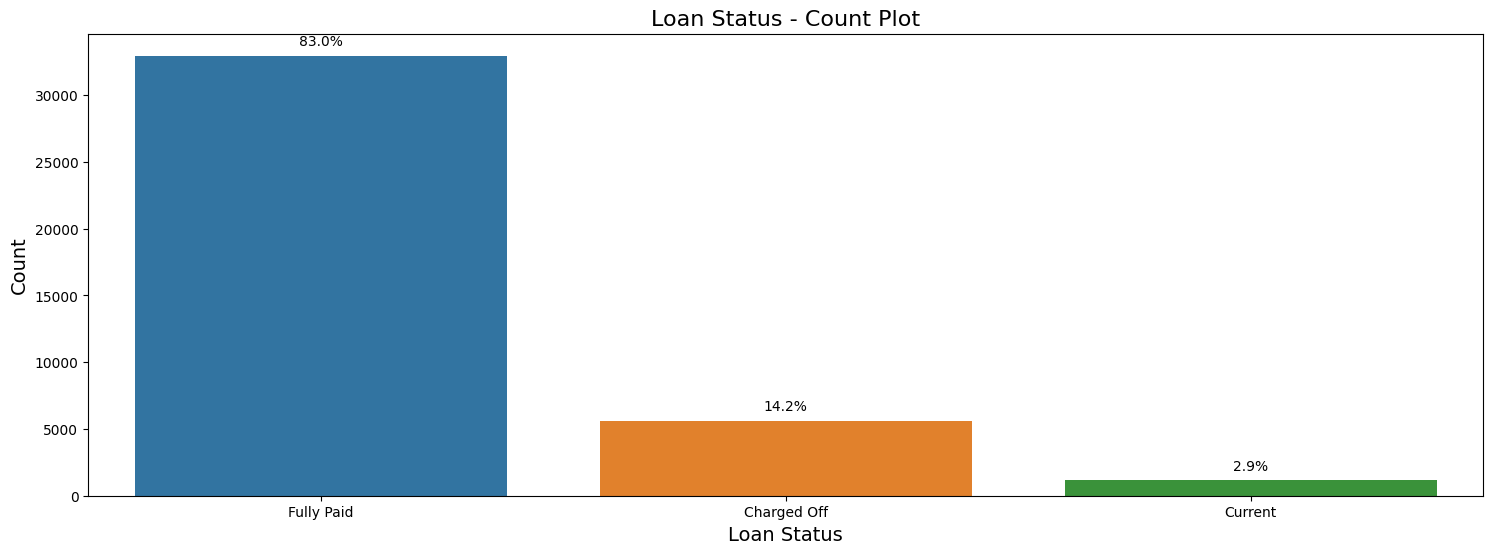

In [32]:
# Analysis of feature "loan_status"

# Specifying plot size
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

# Subplot 1: Count Plot with percentage
bx1 = sns.countplot(x=loan_data.loan_status, order=loan_data.loan_status.value_counts().index, hue=loan_data.loan_status)
bx1.set_title('Loan Status - Count Plot', fontsize=16)
bx1.set_xlabel('Loan Status', fontsize=14)
bx1.set_ylabel('Count', fontsize=14)

# Calculate percentages
total = len(loan_data.loan_status)
for p in bx1.patches:
    height = p.get_height()
    bx1.annotate('{:.1f}%'.format(100 * height / total), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')


plt.show()

In [33]:
(loan_data.select_dtypes(include=np.number)).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   annual_inc               39717 non-null  int64  
 7   dti                      39717 non-null  float64
 8   delinq_2yrs              39717 non-null  int64  
 9   inq_last_6mths           39717 non-null  int64  
 10  open_acc                 39717 non-null  int64  
 11  pub_rec                  39717 non-null  int64  
 12  revol_bal                39717 non-null  int64  
 13  revol_util               39667 non-null  float64
 14  total_acc             

## Biavariate Analysis

In [34]:
loan_num_cols = (loan_data.select_dtypes(include=np.number)).columns
loan_cat_cols = (loan_data.select_dtypes(include=np.object_)).columns

loan_num_cols = loan_num_cols.drop('id')

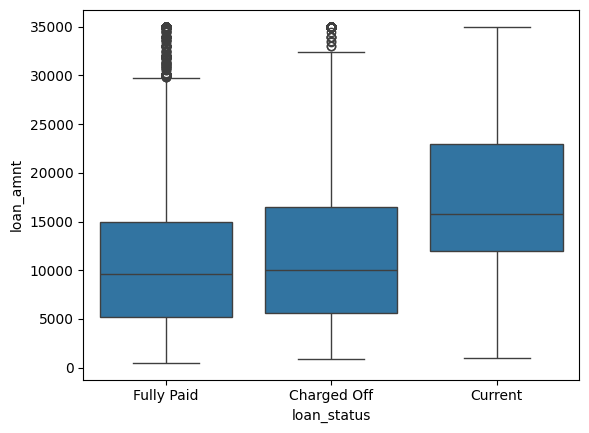

In [35]:
# Effectt of loan_amnt on loan status

sns.boxplot(x=loan_data.loan_status, y= loan_data.loan_amnt)
plt.show()

pub_rec_bankruptcies
0.00        37339
1.00         1674
 Unknown      697
2.00            7
Name: count, dtype: int64


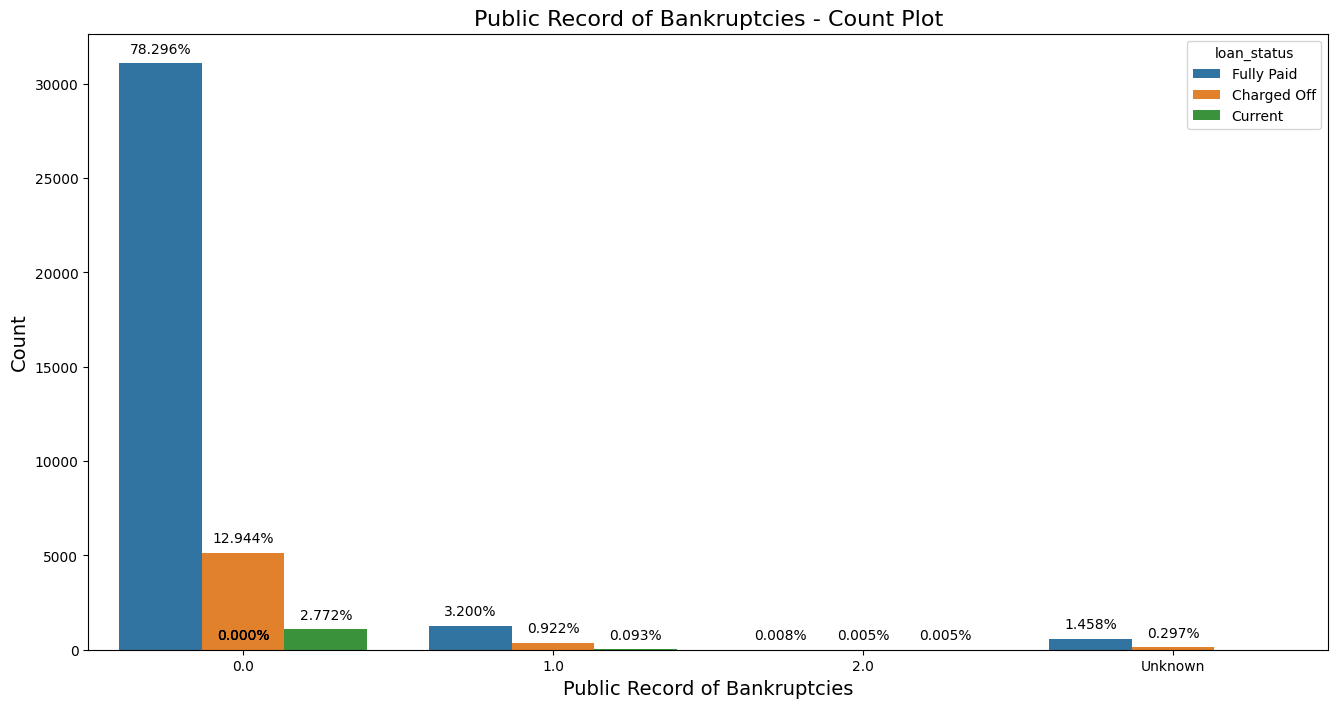

In [66]:
# Effectt of pub_rec_bankruptices on loan status

print(loan_data.pub_rec_bankruptcies.value_counts())

plt.figure(figsize=(16, 8))
bx1 = sns.countplot(x="pub_rec_bankruptcies", hue="loan_status", data=loan_data, stat="count")
bx1.set_title('Public Record of Bankruptcies - Count Plot', fontsize=16)
bx1.set_xlabel('Public Record of Bankruptcies', fontsize=14)
bx1.set_ylabel('Count', fontsize=14)

# Calculate percentages
total = len(loan_data.loan_status)
for p in bx1.patches:
    height = p.get_height()
    bx1.annotate('{:.3f}%'.format(100 * height / total), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
    
plt.show()

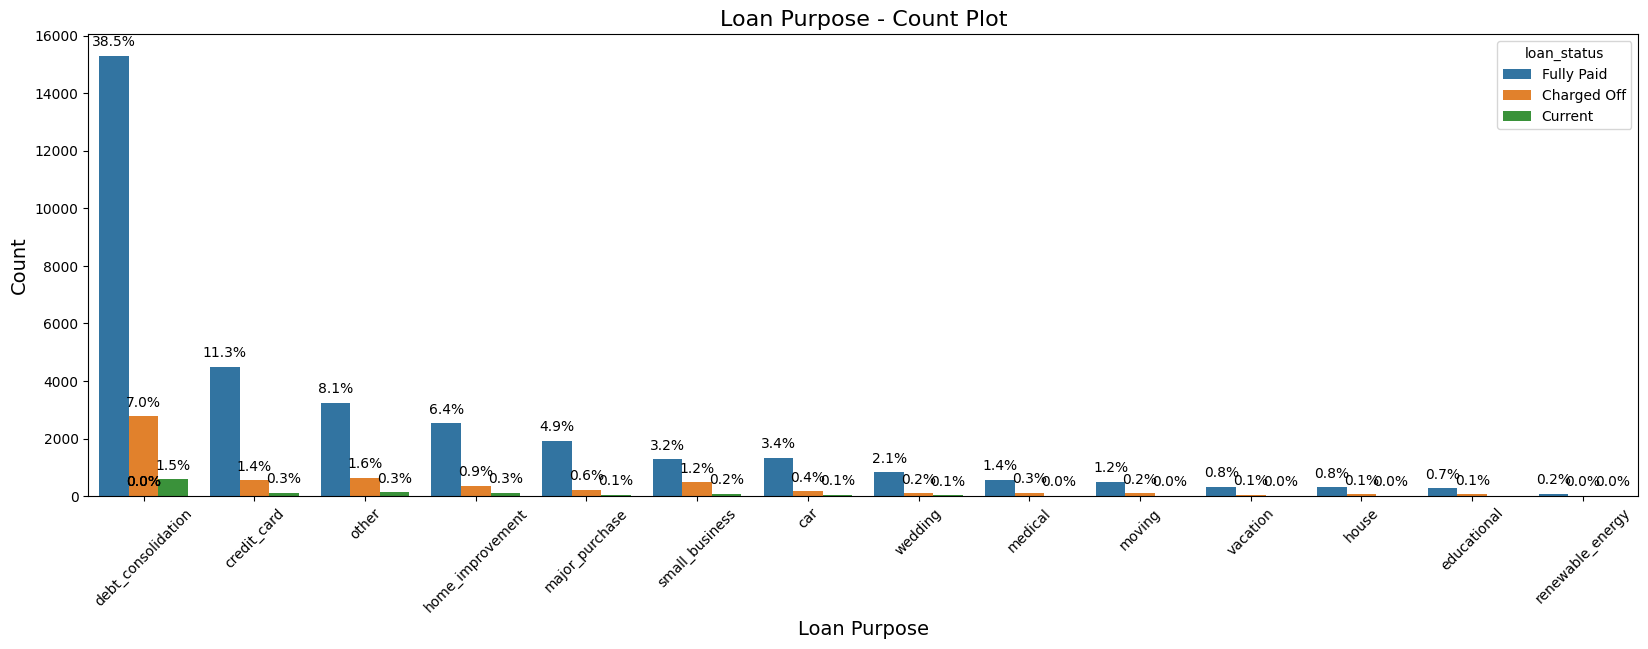

In [65]:
# Analysis of feature "purpose"

# Specifying plot size
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

# Subplot 1: Count Plot with percentage
bx1 = sns.countplot(x=loan_data.purpose, order=loan_data.purpose.value_counts().index, hue=loan_data.loan_status)
bx1.set_title('Loan Purpose - Count Plot', fontsize=16)
bx1.set_xlabel('Loan Purpose', fontsize=14)
bx1.set_ylabel('Count', fontsize=14)
bx1.tick_params(axis='x', rotation=45)

# Calculate percentages
total = len(loan_data.purpose)
for p in bx1.patches:
    height = p.get_height()
    bx1.annotate('{:.1f}%'.format(100 * height / total), (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')


plt.show()

#### <b>"purpose": Loan Purpose features analysis</b>
- ~50% chance that small business loan will be default
- Most people take loans for debt consolidation

*******************************

In [ ]:
loan_data.info()

## Multivariate Metrics

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(loan_data[loan_num_cols].corr(), annot=True)
plt.show()

In [ ]:
# plt.figure(figsize=(50,50))
# sns.pairplot(loan_data, hue="loan_status", 
#              diag_kind="hist", corner=True, 
#              x_vars=loan_cat_cols,
#              y_vars=loan_num_cols,
#             )
# plt.show()

## Dervied Metrics

SyntaxError: invalid syntax (2141461041.py, line 1)

## 